In [43]:
from nutils import *
import numpy, unittest

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import collections

In [44]:
nelems = 20
degree = 1
tol  = 1e-5
ndims = 1

In [45]:
domain, geom = mesh.rectilinear([numpy.linspace(0,1,nelems+1)]*ndims)

In [56]:
# prepare residual
ns = function.Namespace()
ns.pi = numpy.pi
ns.x = geom
ns.basis = domain.basis('discont', degree=degree)
ns.u = 'basis_n ?lhs_n'
ns.C = 10
ns.k = 1      # diffusivity
# analytical solution and forcing vector
ns.pi  = numpy.pi

h = 1.0 / nelems

ns.z = 2.5
ns.g  = 'cos( z pi x_0 )'
ns.dg = '-(z pi) sin( z pi x_0 )'
ns.ddg = '-(z pi)^2 cos( z pi x_0 )'

ns.f   = ' - ddg'

In [57]:
# construct residual and inertia vector
res = domain.integral('basis_n,0 k u_,0 - basis_n f' @ ns, geometry=ns.x, degree=degree*2)
res -= domain.interfaces.integral('-[basis_n] n_0 k {u_,0} - {basis_n,0} n_0 k [u]' @ ns, geometry=ns.x, degree=degree*2)

# C0 continuity residual
res -= domain.interfaces.integral('C [basis_n] n_0 k [u]' @ ns, geometry=ns.x, degree=degree*2)

# boundary
res += domain.boundary.integral('-basis_n k u_,0 n_0' @ ns, geometry=ns.x, degree=degree*2)
res += domain.boundary.integral(' C basis_n,0 k (g - u) n_0' @ ns, geometry=ns.x, degree=degree*2)

solve > solver returned with residual 3e-14


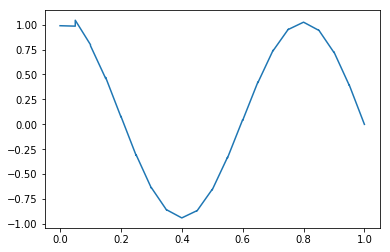

In [58]:
# find lhs such that res == 0 and substitute this lhs in the namespace
# lhs = solver.solve_linear('lhs', res, constrain=cons)
lhs = solver.solve_linear('lhs', res)
ns = ns(lhs=lhs)

# plot solution
bezier = domain.sample('bezier', 9)
x, u = bezier.eval([ns.x, ns.u])
plt.plot(x, u)
# plt.ylim(-2,2)